In [1]:
import sys
sys.path.append('/Users/lisacarr/Documents/SEMDS')
sys.path.append('/Users/lisacarr/Documents/SEMDS/TILseg_Project2024')

import numpy as np
import cv2

from TILseg_Project2024.km_dbscan import kmeans_superpatch_fit, kmeans_til_label 

In [2]:
kmeans = kmeans_superpatch_fit('/Users/lisacarr/Desktop/images/superpatch_training.tif')

In [3]:
patch_path = '/Users/lisacarr/Desktop/images/test patches/position_7_8tissue.tif'
tils_mask_raw, km_labels, til_cluster_label = kmeans_til_label(kmeans, patch_path)

In [8]:
print(km_labels.shape)

(2810, 3992)


In [9]:
binary_tils_mask = (tils_mask_raw > 0).astype(np.uint8)

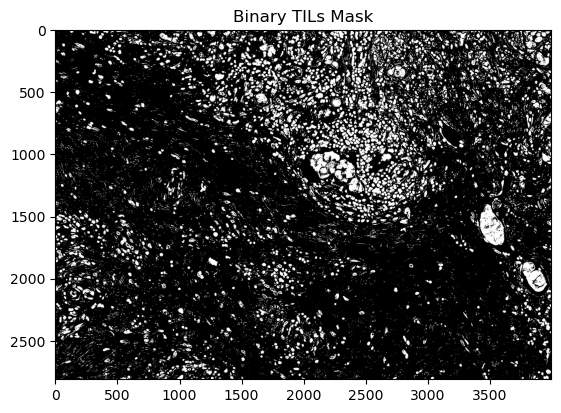

In [10]:
import matplotlib.pyplot as plt

# Assuming binary_tils_mask is your binary mask
plt.imshow(binary_tils_mask, cmap='gray')
plt.title('Binary TILs Mask')
plt.show()

In [17]:
# Create a 3D array with the color
color = np.array([0, 255, 0], dtype=np.uint8)

# Create a 3D array where the color is replicated along the third axis
tils_cluster = np.zeros(tils_mask_raw.shape + (3,), dtype=np.uint8)
tils_cluster[tils_mask_raw] = color

# Display the resulting image
cv2.imshow("TILs", tils_cluster)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
patch_path = '/Users/lisacarr/Desktop/images/test patches/position_7_8tissue.tif'
final_labels = km_dbscan(kmeans, patch_path, 1.0, 10)

: 

In [9]:
def visualize_clusters(labels, title):
    plt.imshow(labels.reshape(image.shape[:2]), cmap='viridis')
    plt.title(title)
    plt.colorbar()

In [ ]:
# Visualize KMeans clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
visualize_clusters(km_labels, 'KMeans Clusters')

# Visualize DBSCAN clusters
plt.subplot(1, 3, 2)
visualize_clusters(dbscan_labels, 'DBSCAN Clusters')

# Visualize final labels
plt.subplot(1, 3, 3)
visualize_clusters(final_labels, 'Final Labels')

plt.tight_layout()
plt.show()